Galaxy Zoo Accuracy

What's the maximum accuracy that an automatic GZ classifier could have?

The perfect classifier would always give the same answer as the recorded votes of the volunteers. So the maximum accuracy is limited by the noise in those votes. 

Let's consider truth as the vote fraction that an **infinite population** of volunteers would produce. We actually measure the vote fraction that a **finite sample** of volunteers produce. 

In the binary classification context, there's two ways our final label (based on the measured vote fraction $\hat{\mu}$) could be different to the 'true' label (based on the 'true' vote fraction $\mu$): 

$$ p(\textrm{wrong label}) = p( \hat{\mu} > 0.5 \cap \mu < 0.5) + p( \hat{\mu} < 0.5 \cap \mu > 0.5) $$

For simplicity of notation, let's look only at the case of a false positive for now:

$$ p(\textrm{false positive}) = p( \hat{\mu} > 0.5 \cap \mu < 0.5) $$

$$= p( \hat{\mu} > 0.5 \mid \mu < 0.5) * p( \mu < 0.5) $$

$\hat{\mu} = X / N $ for $X$ yes votes (successes) of $N$ votes 

$$= p( \frac{X}{N} > 0.5 \mid \mu < 0.5) * p( \mu < 0.5) $$

$$= \int_{0}^{0.5} p( \frac{X}{N} > 0.5 \mid \mu) * p(\mu) d\mu $$



For the left expression, if we assume that the votes can be modelled as a binomial distribution then

$$= \int_{0}^{0.5} \textrm{Bin}(X > \frac{N}{2} \mid N, p=\mu) * p(\mu) d\mu $$


I suppose I could perhaps solve this analytically or with mathematica. For now, let's approximate true $mu$ as also being discrete - just like $\hat{\mu}$

$$= \sum_{i=0}^{\frac{N}{2}} \textrm{Bin}(X > \frac{N}{2} \mid N, p=\mu_i) * p(\mu_i) $$
where $\mu_i$ = 0 through 1


In [1]:
from scipy.stats import binom
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
def p_bin_under_half(n_volunteers, mu):
    return 1 - binom.cdf(k=int(n/2), n=n_volunteers, p=mu)
p_bin_under_half = np.vectorize(p_bin_under_half)

def p_mu_uniform(n_mu, mu):
    return 1 / n_mu  # approximage as discrete on a grid of size N
p_mu_uniform = np.vectorize(p_mu_uniform)

In [12]:
p_bin_under_half(40, 0.5)

array(0.56268534)

In [13]:
def false_positive_acc(n_volunteers, n_mu, visualise=False):
    possible_mu = np.arange(0, n_mu)/(2*n_mu)
    bin_under_half = p_bin_under_half(n_volunteers, possible_mu)
    p_mu = p_mu_uniform(n_mu, possible_mu)

    if visualise:
        plt.plot(possible_mu, bin_under_half)
        plt.plot(possible_mu, p_mu)
        plt.legend(['Binomial p of mistake', 'p of mu'])
        plt.tight_layout()
    return np.sum(bin_under_half * p_mu)

0.07459933204038265

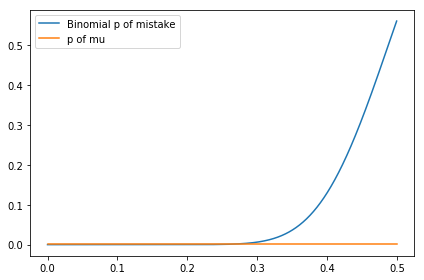

In [14]:
false_positive_acc(40, 1000, visualise=True)

In [17]:
for n_vols in range(4, 40):
    print(false_positive_acc(n_vols, 1000))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.493781501035965e-08
5.149574712708383e-07
3.1003522350786513e-06
1.3050908047599561e-05
4.31383973324746e-05
0.00011924255844883758
0.00028671851220239594
0.0006160445259401222
0.001205995041920679
0.0021828833694041623
0.003695196359251
0.005903951471413049
0.008970038297247315
0.01304041272449553
0.01823517176967885
0.024637269666334418
0.03228606452747173
0.041175180609699415
0.051254497420925506
0.062435552761068
